# Введение в RL и пакет Gymnasium

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://gymnasium.farama.org/
* https://pypi.org/project/ufal.pybox2d/
* https://gymnasium.farama.org/tutorials/gymnasium_basics/environment_creation/
* https://gymnasium.farama.org/api/spaces/fundamental/
* https://gymnasium.farama.org/environments/toy_text/blackjack/

## Задачи для совместного разбора

1. Рассмотрите пример создания окружения `gymnasium` и основные этапы взаимодействия с этим окружением.
<img src="https://gymnasium.farama.org/_images/AE_loop.png" width="300"/>

In [ ]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 11.5 MB/s eta 0:00:00


In [ ]:
!pip install ufal.pybox2d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 12.0 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym

env = gym.make("LunarLander-v2", render_mode="human")
observation, info = env.reset(seed=42)

In [ ]:
observation

array([ 0.00229702,  1.4181306 ,  0.2326471 ,  0.3204666 , -0.00265488,
       -0.05269805,  0.        ,  0.        ], dtype=float32)

In [ ]:
#action = env.action_space.sample()  # this is where you would insert your policy
observation, reward, terminated, truncated, info = env.step(0)
observation

array([ 0.00459394,  1.424763  ,  0.23233262,  0.2947628 , -0.00525882,
       -0.05208295,  0.        ,  0.        ], dtype=float32)

In [ ]:
terminated, truncated

(False, False)

In [ ]:
info

{}

In [ ]:
env.action_space.sample()

0

In [ ]:
def policy(env):
    return env.action_space.sample()

In [ ]:
done = False
observation, info = env.reset(seed=42)

while not done:
    action = policy(env)
    observation, reward, terminated, truncated, info = env.step(action)
    print(f'action={action}, reward={reward}')
    done = terminated or truncated

action=3, reward=0.4747737628440245
action=2, reward=-4.537182559053167
action=1, reward=1.8426957813704246
action=2, reward=-5.431710287071684
action=0, reward=1.3020901402456104
action=1, reward=2.276288511324084
action=2, reward=-1.5381113273663687
action=2, reward=-4.305893766525304
action=1, reward=2.487943443743775
action=0, reward=1.8429394289649679
action=2, reward=-1.48618766819867
action=1, reward=1.360566013735679
action=0, reward=0.7255329261331838
action=3, reward=0.09716774508751883
action=2, reward=-4.278502065804321
action=3, reward=0.19395534276813578
action=2, reward=-1.7686376088995417
action=0, reward=1.0126507579854547
action=3, reward=0.21514117886644726
action=2, reward=-3.180112887705792
action=3, reward=0.36057786194871366
action=1, reward=1.9196296077047645
action=3, reward=0.08638831314260756
action=3, reward=-0.018835466394533568
action=1, reward=1.63436668651437
action=1, reward=1.3857705186345595
action=2, reward=-0.15532288481880413
action=2, reward=-0.17

In [ ]:
terminated, truncated

(True, False)

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Создайте окружение `Blackjack-v1`. Сыграйте `N=10000` игр, выбирая действие случайным образом. Посчитайте и выведите на экран долю выигранных игр.

- [ ] Проверено на семинаре

In [ ]:
import gymnasium as gym

env = gym.make("Blackjack-v1")
observation, info = env.reset(seed=42)

def policy(env):
    return env.action_space.sample()

N = 10_000
win = 0
for _ in range(N):
    observation, info = env.reset()
    done = False
    while not done:
        action = policy(env)
        observation, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
    if reward == 1:
        win += 1

In [ ]:
win / N

0.5025

<p class="task" id="2"></p>

2\. Создайте окружение `Blackjack-v1`. Предложите стратегию, которая позволит, в среднем, выигрывать чаще, чем случайный выбор действия. Реализуйте эту стратегию и сыграйте `N=10000` игр, выбирая действие согласно этой стратегии. Посчитайте и выведите на экран долю выигранных игр.

- [ ] Проверено на семинаре

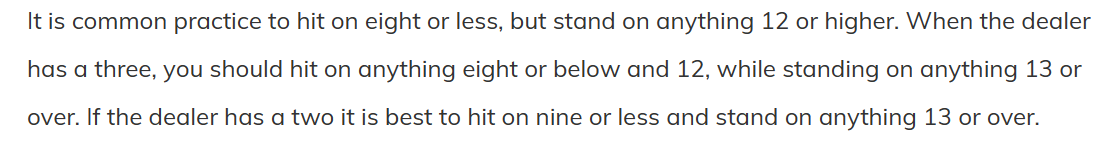

In [ ]:
env = gym.make("Blackjack-v1")
observation, info = env.reset(seed=42)

def policy(env, observation):
    if observation[1] == 3:
        if observation[0] <= 8:
            return 1
        elif observation[0] >= 12:
            return 0
    else:
        if observation[0] <= 9:
            return 1
        elif observation[0] >= 13:
            return 0
    return env.action_space.sample()

N = 10_000
win = 0
for _ in range(N):
    observation, info = env.reset()
    done = False
    while not done:
        action = policy(env, observation)
        observation, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
    if reward == 1:
        win += 1

In [ ]:
win / N

1.0

<p class="task" id="3"></p>

3\. Создайте окружение для игры в крестики-нолики, реализовав интерфейс `gym.Env`. Решение должно удовлетворять следующим условиям:
* для создания пространства состояний используется `spaces.Box`;
* для создания пространства действий используется `spaces.MultiDiscrete`;
* игра прекращается, если:
    - нет возможности сделать ход;
    - игрок пытается отметить уже выбранную ячейку.
* после каждого хода игрок получает награду:
    - 0, если игра не закончена;
    - 1, если игрок выиграл;
    - -1, если игрок проиграл.
* стратегию выбора действия для второго игрока (машины) определите самостоятельно.

Сыграйте одну игру, выбирая действия случайным образом. Выведите на экран состояние окружения после каждого хода и итоговую награду пользователя за сессию.

- [ ] Проверено на семинаре

In [ ]:
import numpy as np
from gymnasium.spaces import Box, MultiDiscrete

In [ ]:
class TicTacToe(gym.Env):
    def __init__(self):
        self.board = np.zeros((3, 3))
        self.observation = Box(low=-1, high=1, shape=(3, 3), dtype=np.int8)
        self.action_space = MultiDiscrete(9)
        self.current_player = 1
        self.num_steps = 0
        self.done = False

    def reset(self):
        self.board = np.zeros((3, 3))
        self.current_player = 1
        self.num_steps = 0
        self.done = False

    def step(self, action):
        row = action // 3
        col = action % 3
        if self.board[row, col] == 0:
            self.board[row, col] = self.current_player
            if self.check_game_over():
                self.done = True
        else:
            print('Ячейка уже занята!')
            self.done = True

        reward = 0
        if self.done:
            if self.current_player == 1:
                reward = 1
            else:
                reward = -1

        self.current_player = -self.current_player
        self.num_steps += 1

        return self.current_player, self.board, reward, self.done

    def check_game_over(self):
        if 3 in self.board.sum(axis=1) or -3 in self.board.sum(axis=1):
            return True
        elif -3 in self.board.sum(axis=0) or 3 in self.board.sum(axis=0):
            return True
        if np.sum(np.diag(self.board)) == 3 or np.sum( np.diag(np.fliplr(self.board))) == 3:
            return True
        if np.sum(np.diag(self.board)) == -3 or np.sum( np.diag(np.fliplr(self.board))) == -3:
            return True
        if self.num_steps >= 8:
            return True
        return False

In [ ]:
env = TicTacToe()
state = env.reset()
player = 1
choose = set(np.array(range(0, 10)))
done = False
used_actions = set([9])
while not done:
    if player == -1:
        choose = choose - used_actions
        action = np.random.choice(list(choose))
    else:
        action = np.random.choice(range(0, 9))
    used_actions.add(action)
    print(f'action={action}')
    print('player', player)
    player, board, reward, done = env.step(action)
    print(board)
    print("Reward:", reward)

print("Игра окончена. Пользователь получил награду:", reward)

action=2
player 1
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
Reward: 0
action=4
player -1
[[ 0.  0.  1.]
 [ 0. -1.  0.]
 [ 0.  0.  0.]]
Reward: 0
action=7
player 1
[[ 0.  0.  1.]
 [ 0. -1.  0.]
 [ 0.  1.  0.]]
Reward: 0
action=3
player -1
[[ 0.  0.  1.]
 [-1. -1.  0.]
 [ 0.  1.  0.]]
Reward: 0
action=0
player 1
[[ 1.  0.  1.]
 [-1. -1.  0.]
 [ 0.  1.  0.]]
Reward: 0
action=5
player -1
[[ 1.  0.  1.]
 [-1. -1. -1.]
 [ 0.  1.  0.]]
Reward: -1
Игра окончена. Пользователь получил награду: -1


<p class="task" id="4"></p>

4\. Предложите стратегию (в виде алгоритма без использования методов машинного обучения), которая позволит, в среднем, выигрывать в крестики-нолики чаще, чем случайный выбор действия. Реализуйте эту стратегию и сыграйте игру, выбирая действия согласно этой стратегии. Выведите на экран состояние окружения после каждого хода и итоговую награду пользователя за сессию.

- [ ] Проверено на семинаре

In [ ]:
def policy(board, choose, used_actions):
    row_sum = board.sum(axis=1)
    column_sum = board.sum(axis=0)
    diag_sum = np.sum(np.diag(board))
    if 2 in row_sum:
        s = np.where(row_sum == 2)[0]
        for i in range(3):
            if board[s][i] == 0:
                return (3 * s + i)[0]
    if 2 in column_sum:
        s = np.where(column_sum == 2)[0]
        for i in range(3):
            if board[i][s] == 0:
                return (3 * i + s)[0]
    if diag_sum == 2:
        for i in range(3):
            if board[i][i] == 0:
                return (3 * i + i)
    return np.random.choice(list(choose))

In [ ]:
env = TicTacToe()
state = env.reset()

player = 1
action = 4
done = False
print('player', player)
print(f'action={action}')

player, board, reward, done = env.step(action)
print(board)

choose = set(np.array(range(0, 9)))
used_actions = set([4])
choose = choose - used_actions

while not done:
    if player == -1:
        action = np.random.choice(list(choose))
    else:
        action = policy(board, choose, used_actions)
    used_actions.add(action)
    choose = choose - used_actions
    print('player', player)
    print(f'action={action}')
    player, board, reward, done = env.step(action)
    print(board)
    print("Reward:", reward)

print("Игра окончена. Пользователь получил награду:", reward)

player 1
action=4
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
player -1
action=3
[[ 0.  0.  0.]
 [-1.  1.  0.]
 [ 0.  0.  0.]]
Reward: 0
player 1
action=7
[[ 0.  0.  0.]
 [-1.  1.  0.]
 [ 0.  1.  0.]]
Reward: 0
player -1
action=5
[[ 0.  0.  0.]
 [-1.  1. -1.]
 [ 0.  1.  0.]]
Reward: 0
player 1
action=1
[[ 0.  1.  0.]
 [-1.  1. -1.]
 [ 0.  1.  0.]]
Reward: 1
Игра окончена. Пользователь получил награду: 1


<p class="task" id="5"></p>

5\. Создайте окружение `MountainCar-v0`. Проиграйте 10 эпизодов и сохраните на диск файл с записью каждого пятого эпизода. Для записи видео воспользуйтесь обёрткой `RecordVideo`. Вставьте скриншот, на котором видно, что файлы были созданы.

- [ ] Проверено на семинаре

In [ ]:
!sudo apt-get install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [ ]:
env = gym.make('MountainCar-v0', render_mode='rgb_array')
env = gym.wrappers.RecordVideo(env, video_folder='mountaincar', video_length=200)

for episode in range(10):
  observation, info = env.reset()
  done = False
  while not done:
    action = env.action_space.sample()
    observation, reward, done, info, _ = env.step(action)
  if (episode) % 5 == 0:
    env.render()

Moviepy - Building video /content/mountaincar/rl-video-episode-0.mp4.
Moviepy - Writing video /content/mountaincar/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/mountaincar/rl-video-episode-0.mp4
Moviepy - Building video /content/mountaincar/rl-video-episode-1.mp4.
Moviepy - Writing video /content/mountaincar/rl-video-episode-1.mp4



Moviepy - Done !
Moviepy - video ready /content/mountaincar/rl-video-episode-1.mp4
Moviepy - Building video /content/mountaincar/rl-video-episode-8.mp4.
Moviepy - Writing video /content/mountaincar/rl-video-episode-8.mp4



Moviepy - Done !
Moviepy - video ready /content/mountaincar/rl-video-episode-8.mp4


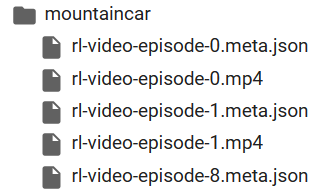

## Обратная связь
- [x] Хочу получить обратную связь по решению